## Observations and Insights 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = mouse_study_df['Mouse ID'].nunique()
print(f'Number of mice: {num_mice}')

Number of mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_df.loc[mouse_study_df[['Mouse ID', 'Timepoint']].duplicated()]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = mouse_study_df.loc[mouse_study_df['Mouse ID']=='g989']
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='first')
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
num_cleanmice = clean_df['Mouse ID'].nunique()
num_cleanmice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
st_dev = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summ_table1 = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Deviation": st_dev,
    "Tumor Volume Std. Error": sem
})

summ_table1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Deviation,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
summ_table2 = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
summ_table2 = summ_table2.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Deviation',
    'sem': 'Tumor Volume Std. Error'})

summ_table2

Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.393463           50.909965             43.138803   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                                  
             Tumor Volume Std. Deviation Tumor Volume Std. Error  
Drug Regimen                                                      
Capomulin                       4.994774                0.329346  
Ceftamin                        6.268188                0.469821  
Infubinol                       6.567243                0.492236  
Ketapril                        8.279709                0.603860  
Naftisol                        8.134708                0.596466  
Placebo                         7.821003                0.581331  
Propriva                        6.568014                0.525862  
Ramicane                        4.846308                0.320955  
Stelasyn                        7.710419                0.573111  
Zoniferol                       6.966589                0.516398

## Bar and Pie Charts

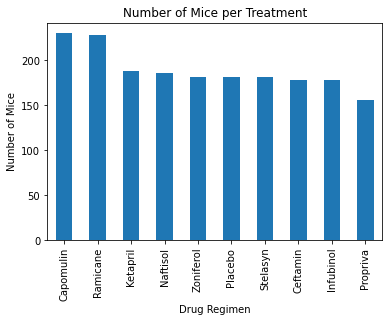

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_one = clean_df['Drug Regimen'].value_counts()
bar_one.plot(kind='bar')
plt.title('Number of Mice per Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()

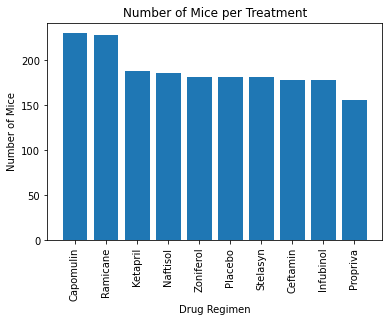

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bar_two = clean_df['Drug Regimen'].value_counts()
x_axis = bar_two.index.values
y_axis = bar_two.values

plt.bar(x_axis, y_axis)
plt.title('Number of Mice per Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.xticks(rotation='vertical')
plt.show()

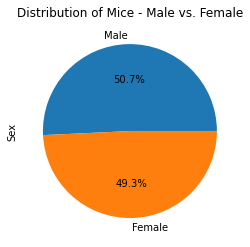

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
py_one = clean_df['Sex'].value_counts()
py_one.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Distribution of Mice - Male vs. Female')
plt.show()

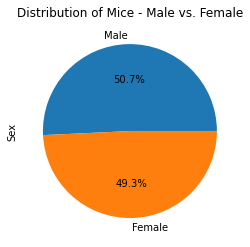

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
py_two = clean_df['Sex'].value_counts()
sex_values = py_two.values
sex_labels = py_two.index.values

plt.pie(sex_values, labels = sex_labels, autopct = '%1.1f%%')
plt.title('Distribution of Mice - Male vs. Female')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_drug = clean_df.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_merge_df = pd.merge(clean_df, last_drug, how = 'inner', on = ['Mouse ID', 'Timepoint'])
drug_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drug_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = drug_merge_df.loc[drug_merge_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    # add subset
    tumor_vol_data.append(tumor_vol)
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

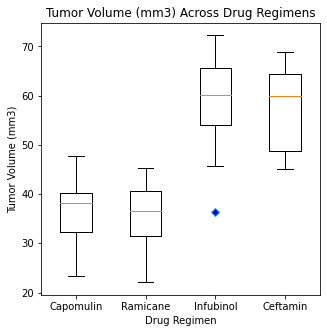

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

blue_dot = dict(markerfacecolor="b",marker="D", markeredgecolor="c")
fig1, ax1 = plt.subplots(figsize = (5,5))
ax1.boxplot(tumor_vol_data, flierprops = blue_dot)
ax1.set_title('Tumor Volume (mm3) Across Drug Regimens')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.xaxis.set(ticks=range(1,len(drug_list) + 1), ticklabels=drug_list)
plt.show()

## Line and Scatter Plots

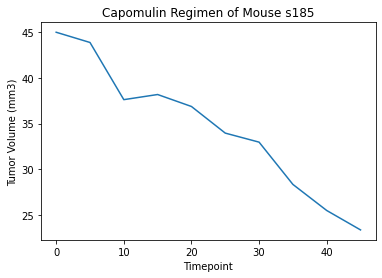

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
s185_mouse = capomulin_df.loc[capomulin_df['Mouse ID'] == 's185']

plt.plot(s185_mouse['Timepoint'], s185_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Regimen of Mouse s185')
plt.show()

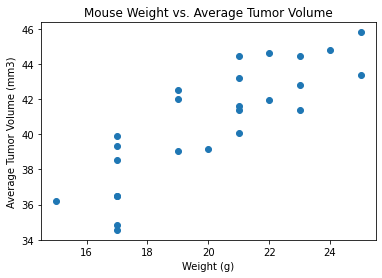

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_capomulin = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(avg_capomulin['Weight (g)'], avg_capomulin['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.show()

## Correlation and Regression

The correlation between mouse weigh and the average tumor volume is 0.84.


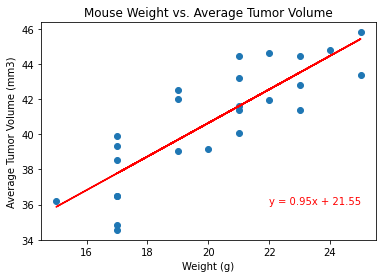

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capomulin['Weight (g)'], avg_capomulin['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.')
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_capomulin['Weight (g)'], avg_capomulin['Tumor Volume (mm3)'])
line = avg_capomulin['Weight (g)'] * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(avg_capomulin['Weight (g)'], avg_capomulin['Tumor Volume (mm3)'])
plt.plot(avg_capomulin['Weight (g)'], line, color = 'red')
plt.annotate(line_eq, (22,36), color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume')
plt.show()